## Questions that we want to answer through our analysis:
> #### 1. Identify the top five films by revenue
> #### 2. What is the percentage share (revenue) of each of the top ten movies?
> #### 3. How did the monthly average revenue change during the year?

In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set()
url='https://en.wikipedia.org/wiki/List_of_2018_box_office_number-one_films_in_France'
req=requests.get(url)
type(req)
data=pd.read_html(req.text)
type(data)

list

In [4]:
df=data[0]
type(df)
df.head()

,#,Date,Film,Gross,Notes
0,1,"January 7, 2018",Star Wars: The Last Jedi,"US$6,557,062",[1]
1,2,"January 14, 2018",Jumanji: Welcome to the Jungle,"US$2,127,871",[2]
2,3,"January 21, 2018",Brillantissime,"US$2,006,033",[3]
3,4,"January 28, 2018",The Post,"US$2,771,269",[4]
4,5,"February 4, 2018",Les Tuche 3,"US$16,604,101",[5]


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   #       50 non-null     int64 
 1   Date    50 non-null     object
 2   Film    50 non-null     object
 3   Gross   50 non-null     object
 4   Notes   50 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.1+ KB


In [6]:
df.shape

(50, 5)

In [7]:
df.describe()

,#
count,50.00000
mean,25.50000
std,14.57738
min,1.00000
25%,13.25000
50%,25.50000
75%,37.75000
max,50.00000


In [8]:
df['Gross']=df['Gross'].str.replace(r'US\$','')

In [9]:
df['Gross']=df['Gross'].str.replace(r',','')

In [10]:
df['Date']=df['Date'].astype('datetime64')

In [11]:
df['Gross']=df['Gross'].astype('int64')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   #       50 non-null     int64         
 1   Date    50 non-null     datetime64[ns]
 2   Film    50 non-null     object        
 3   Gross   50 non-null     int64         
 4   Notes   50 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 2.1+ KB


In [13]:
df['Month']=pd.DatetimeIndex(df['Date']).month


In [14]:
df['Gross'].describe()

count    5.000000e+01
mean     6.071005e+06
std      3.810280e+06
min      1.414632e+06
25%      3.090546e+06
50%      5.153978e+06
75%      8.051876e+06
max      1.764530e+07
Name: Gross, dtype: float64

In [15]:
df.head()

,#,Date,Film,Gross,Notes,Month
0,1,2018-01-07,Star Wars: The Last Jedi,6557062,[1],1
1,2,2018-01-14,Jumanji: Welcome to the Jungle,2127871,[2],1
2,3,2018-01-21,Brillantissime,2006033,[3],1
3,4,2018-01-28,The Post,2771269,[4],1
4,5,2018-02-04,Les Tuche 3,16604101,[5],2


In [16]:
df.drop(['#','Notes'],axis=1,inplace=True)

In [17]:
df.rename(columns={'Date':'date','Film':'film','Gross':'gross','Month':'month'},inplace=True)

In [18]:
df.head()

,date,film,gross,month
0,2018-01-07,Star Wars: The Last Jedi,6557062,1
1,2018-01-14,Jumanji: Welcome to the Jungle,2127871,1
2,2018-01-21,Brillantissime,2006033,1
3,2018-01-28,The Post,2771269,1
4,2018-02-04,Les Tuche 3,16604101,2


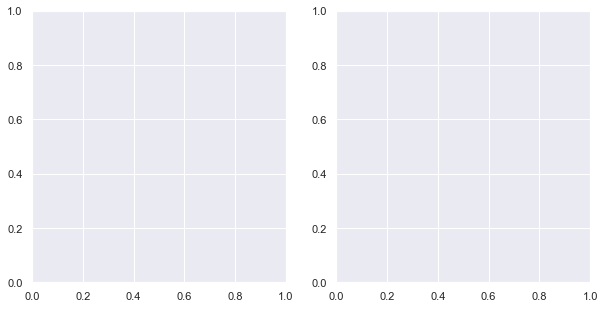

In [19]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
df1=df[['film','gross']].sort_values(by='gross',ascending=False)

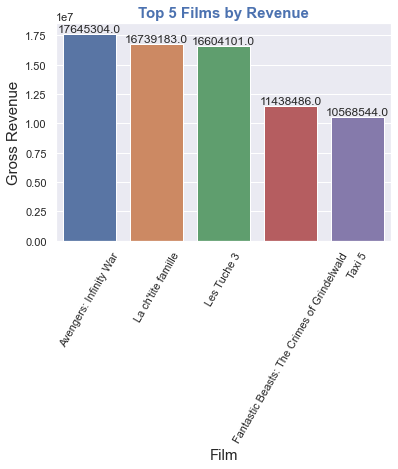

In [20]:
#ax1=sns.barplot(x=df.head(5)['film'].sort_values(),y='gross',data=df1)
ax1=sns.barplot(x='film',y='gross',data=df1.head(5))
ax1.set_xticklabels(labels=df1.head(5)['film'],rotation=60)
ax1.set_ylabel('Gross Revenue',size=15)
ax1.set_xlabel('Film',size=15)
ax1.set_title('Top 5 Films by Revenue',size=15,fontweight='bold',color='b')
for p in ax1.patches:
    ax1.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()), ha='center',va='bottom')

In [21]:
ax2=fig.add_subplot(121)


Text(0.5, 1.5, ' Pie chart depicting the share of top ten movies by revenue')

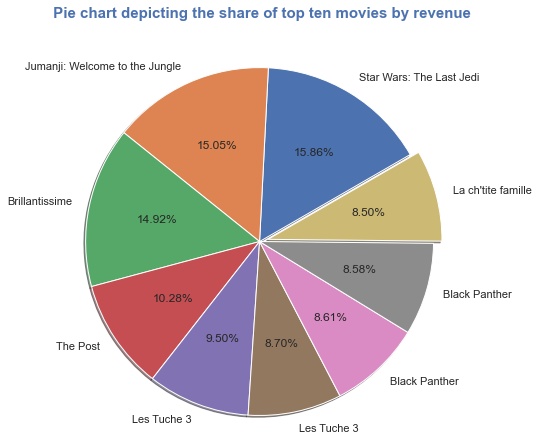

In [22]:
plt.pie(x='gross',labels=df.head(9)['film'],data=df1.head(9),autopct='%.2f%%',explode=[0,0,0,0,0.,0,0,0,0.1],startangle =30,shadow=True,radius=2)
plt.title(' Pie chart depicting the share of top ten movies by revenue',y=1.5,size=15,fontweight='bold',color='b')


In [23]:
df2=df.groupby('month')['gross'].mean()

<AxesSubplot:title={'center':'Average box office monthly revenue in 2018'}, xlabel='month'>

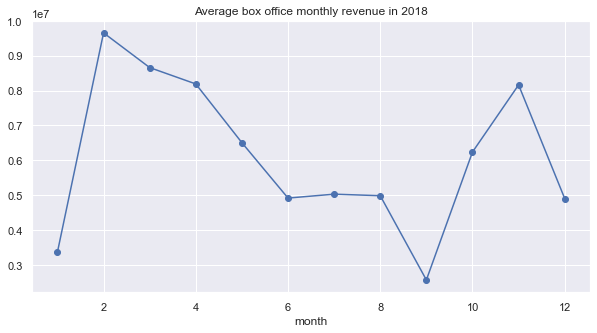

In [24]:
df2.plot(kind='line',figsize=(10,5),marker='o',title='Average box office monthly revenue in 2018')

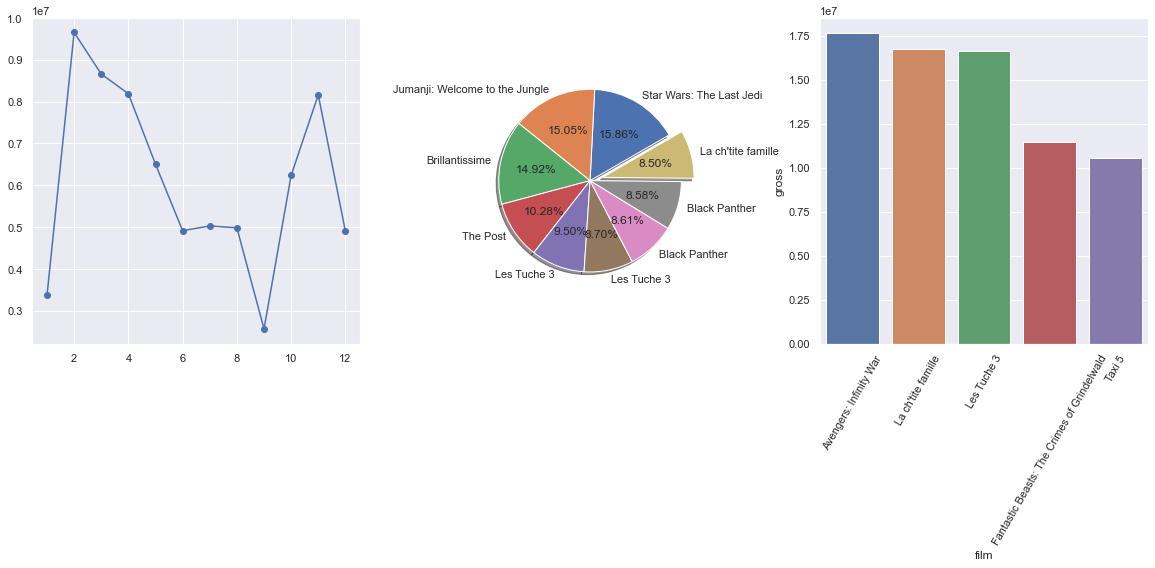

In [25]:
fig,(axx1,axx2,axx3)=plt.subplots(1,3,figsize=(20,6))
axx3=sns.barplot(x='film',y='gross',data=df1.head(5))
axx3.set_xticklabels(labels=df1.head(5)['film'],rotation=60)
axx2.pie(x='gross',labels=df.head(9)['film'],data=df1.head(9),autopct='%.2f%%',explode=[0,0,0,0,0.,0,0,0,0.1],startangle =30,shadow=True,radius=0.7)
axx1.plot(df2,marker='o')

### 1. The average monthly revenue shows wide variation, possibly
> ### dependent on the month of release of the movies, which may necessitate further analysis across the years.
### 2. The top three highest-revenue-grossing movies in France in the 
> ###  year 2018 were Avengers, La Ch’tite Famille, and Les Tuche 3.